In [1]:
from pyneuroml import pynml
from matplotlib import pyplot as plt
%matplotlib inline
import numpy

lems_files = ['LEMS_Gfluct_test.xml']
all_results = {}

dt = 0.05
data_start = int(1e3/dt)
data_end = int(2e3/dt)

for lems_file in lems_files:
    
    all_results[lems_file] = pynml.run_lems_with_jneuroml(lems_file, nogui=True, load_saved_data=True)
    print("Finished running LEMS file: %s"%lems_file)

pyNeuroML >>> INFO - Loading LEMS file: LEMS_Gfluct_test.xml and running with jNeuroML
pyNeuroML >>> INFO - Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/homebrew/anaconda3/envs/py39n/lib/python3.9/site-packages/pyneuroml/lib/jNeuroML-0.12.2-jar-with-dependencies.jar"  LEMS_Gfluct_test.xml  -nogui -I '') in directory: .
pyNeuroML >>> INFO - Command completed successfully!


Finished running LEMS file: LEMS_Gfluct_test.xml


pyNeuroML >>> INFO - Generating plot: Conductances generated from LEMS_Gfluct_test.xml
pyNeuroML >>> INFO - Generating plot: Histogram of conductances from LEMS_Gfluct_test.xml


Reloaded data: dict_keys(['t', 'Pop0/0/IF_curr_exp/v', 'Pop0/1/IF_curr_exp/v', 'Pop0/2/IF_curr_exp/v', 'Pop0/3/IF_curr_exp/v', 'Pop0/4/IF_curr_exp/v', 'Pop0/0/IF_curr_exp/synapses:both:0/i', 'Pop0/0/IF_curr_exp/synapses:both:0/g_e', 'Pop0/0/IF_curr_exp/synapses:both:0/g_e1', 'Pop0/0/IF_curr_exp/synapses:both:0/g_i', 'Pop0/0/IF_curr_exp/synapses:both:0/g_i1'])


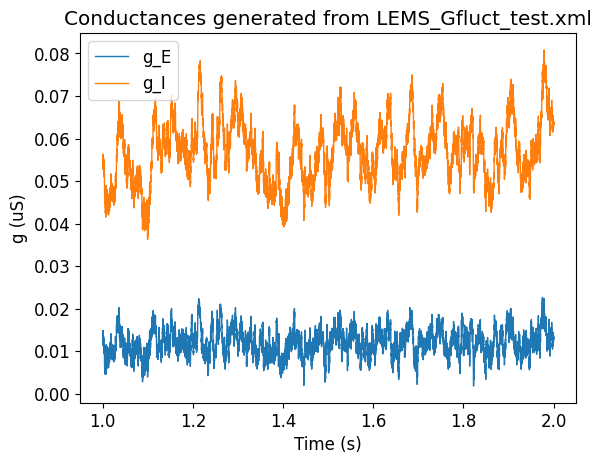

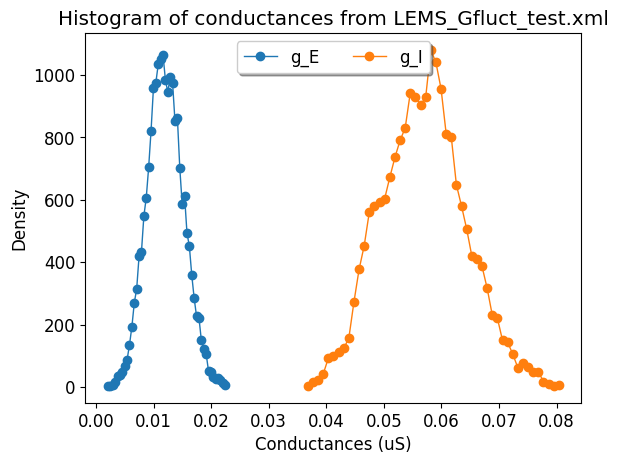

In [2]:

for lems_file in lems_files:

    results = all_results[lems_file]

    print("Reloaded data: %s"%results.keys())

    ax = pynml.generate_plot([results['t'][data_start:data_end],results['t'][data_start:data_end]],                        
                             [numpy.array(results['Pop0/0/IF_curr_exp/synapses:both:0/g_e'][data_start:data_end])*1e6,
                              numpy.array(results['Pop0/0/IF_curr_exp/synapses:both:0/g_i'][data_start:data_end])*1e6,
                              ],                  
                             "Conductances generated from %s"%lems_file,                 
                             xaxis = 'Time (s)',          
                             yaxis = 'g (uS)',
                             labels=['g_E','g_I'],
                             title_above_plot=True,
                             show_plot_already=False)
    
    bins=50

    hist1, edges1 = numpy.histogram(numpy.array(results['Pop0/0/IF_curr_exp/synapses:both:0/g_e'][data_start:data_end])*1e6,bins=bins)
    mid1 = [e +(edges1[1]-edges1[0])/2 for e in edges1[:-1]]

    hist2, edges2 = numpy.histogram(numpy.array(results['Pop0/0/IF_curr_exp/synapses:both:0/g_i'][data_start:data_end])*1e6,bins=bins)
    mid2 = [e +(edges2[1]-edges2[0])/2 for e in edges2[:-1]]

    xs = [mid1,mid2]
    ys = [hist1, hist2]
    markers = ['o','o','o']
    labels = ['g_E','g_I']
    
    
    ax.legend()
    ax = pynml.generate_plot(xs,                        
                             ys,                  
                             "Histogram of conductances from %s"%lems_file,                 
                             xaxis = 'Conductances (uS)',          
                             yaxis = 'Density',
                             title_above_plot=True,
                             markers = markers,
                             show_plot_already=False,
                             labels=labels)
        

plt.show()